# Mission 3

- 아래의 데이터는 회원제로 운영되고 있는 **친환경 식품을 판매하는 소매점**에서 나온 판매 데이터 / 고객 데이터 입니다. 매장에서 제품을 결제하려면 코스트코와 같이, 회원등록을 해야만 결제가 가능합니다. 회원 등록할 때, 회원의 연령, 성별과 같은 기본정보를 수집한 **고객 데이터**가 있습니다. 그리고 각 회원이 매장에서 결제를 진행할 때, 한 제품을 바코드에 찍을 때 마다 발생하는 **결제 데이터**가 존재합니다. 이 두가지 데이터를 이용해서, 아래의 미션을 수행해 봅시다. 

- 먼저 개인 스스로 풀어보고, 풀지 못한 미션은 팀원들과 같이 풀어보세요.
- Chat GPT + 교재 + 팀스터디 모두 활용하여 풀어보시길 바랍니다. 
- 미션 미제출시, 수료증 발급에 제한이 될 수 있습니다. 

- **기한 : 24년 6월 10일 23시 59분까지 / 이후 제출 절대 인정 불가**  
- 제출처: woghkszhf@naver.com  

- 참고 영상 : 
    - 시각화 관련 : https://youtube.com/playlist?list=PLhdHuKlSngGw314hPvsbqV38YY1rqpCkW
    - 데이터 전처리 관련 : https://youtube.com/playlist?list=PLhdHuKlSngGxL_R2g8OYFtsUKs-mMhRBs

1. 1_store_member.csv 데이터를 df_member 변수로, 2_store_product.csv 데이터를 df_product변수로 선언하고, 각각의 데이터의 구조와 타입을 확인하시오  

In [1]:
import pandas as pd
df_member = pd.read_csv('1_store_member.csv')
df_product = pd.read_csv('2_store_product.csv')

print(df_member.info())
print(df_product.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4396 entries, 0 to 4395
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   회원번호    4396 non-null   int64 
 1   회원상태    4396 non-null   object
 2   성별      4396 non-null   object
 3   결혼유무    3449 non-null   object
 4   주소      4396 non-null   object
 5   생년      4396 non-null   int64 
 6   연령      4396 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 240.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735783 entries, 0 to 735782
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   공급일자      735783 non-null  int64  
 1   물품코드      735783 non-null  int64  
 2   물품대분류     735783 non-null  object 
 3   물품중분류     735783 non-null  object 
 4   물품소분류     735783 non-null  object 
 5   물품명       735783 non-null  object 
 6   구매수량      735783 non-null  float64
 7   구매금액      735783 non-null  int64  
 8

2.  df_product 데이터에서, '회원번호' 별 '구매금액'과 '구매수량'의 합을 계산하고 pandas 라이브러리의 reset_index()함수를 활용해,아래와 같은 테이블로 변환하여, df_product_id 변수로 선언하시오. 

In [2]:
df_product_id = df_product.pivot_table(index = '회원번호', values = ['구매금액', '구매수량'], aggfunc = 'sum').reset_index()
df_product_id

,회원번호,구매금액,구매수량
0,2101.0,1991230,382.0
1,2102.0,2095860,472.5
2,2103.0,8273550,1675.4
3,2104.0,6289495,1401.8
4,2105.0,3067930,602.0
...,...,...,...
4280,6492.0,51550,10.0
4281,6493.0,22500,3.0
4282,6494.0,18500,3.0
4283,6495.0,5300,1.0


3. pandas 라이브러리의 rename() 함수를 활용하여, df_product_id 변수의 '구매금액'과 '구매수량'항목 명을, '총구매금액', '총구매수량'으로 변환하시오. 

In [3]:
#p2 = p1.rename(columns={'구매금액':'총구매금액', '구매수량':'총구매수량'})
df_product_id = df_product_id.rename(columns = {'구매금액':'총구매금액', '구매수량':'총구매수량'})
df_product_id

,회원번호,총구매금액,총구매수량
0,2101.0,1991230,382.0
1,2102.0,2095860,472.5
2,2103.0,8273550,1675.4
3,2104.0,6289495,1401.8
4,2105.0,3067930,602.0
...,...,...,...
4280,6492.0,51550,10.0
4281,6493.0,22500,3.0
4282,6494.0,18500,3.0
4283,6495.0,5300,1.0


4. df_product 데이터에서, '회원번호' 항목과, '공급일자' 데이터를 활용해, 아래와 같이 각 '회원번호'별 '방문횟수'의 합을 계산하여, df_product_id2 변수로 선언하시오. 

In [4]:
#df_product_id2 = df_product
#회원번호별 숫자의 공급일자가 몇개인지 먼저 확인 (근데 하루 안에 온 거는 안치는 건가벼)
#df_product['방문횟수'] = 1

#p1 = df_product.pivot_table(index=['회원번호', '공급일자'], values='방문횟수', aggfunc='min').reset_index()
#df_product_id2 = p1.pivot_table(index = '회원번호', values = '방문횟수', aggfunc='sum').reset_index()
#df_product_id2 = df_product_id2.rename(columns = {'방문횟수':'총방문횟수'})
#df_product_id2

df_product_id2 = df_product.groupby(['회원번호', '공급일자']).size().reset_index(name='총방문횟수').groupby('회원번호').agg({'총방문횟수':'sum'})
print(df_product_id2)

        총방문횟수
회원번호         
2101.0    342
2102.0    409
2103.0   1598
2104.0   1180
2105.0    512
...       ...
6492.0      9
6493.0      3
6494.0      3
6495.0      1
6496.0      7

[4285 rows x 1 columns]


5. 앞서 생성한 df_product_id 변수와 df_product_id2 변수, df_member 변수를 이용해, '회원번호'를 기준으로 아래와 같이 하나의 데이터로 병합하고, df2 변수로 선언하시오. (pandas merge함수 활용)

In [5]:
#데이터 테이블 병합 : pd.merge(데이터1, 데이터2, on = '기준이되는항목', how='병합방식')

p2 = pd.merge(df_product_id, df_member, on = '회원번호', how= 'outer')
df2 = pd.merge(df_product_id2, p2, on = '회원번호', how= 'outer')
df2

,회원번호,총방문횟수,총구매금액,총구매수량,회원상태,성별,결혼유무,주소,생년,연령
0,2101.0,342.0,1991230.0,382.0,정상회원,여,기혼,서울 강북구 미아동 134-,1967,51
1,2102.0,409.0,2095860.0,472.5,정상회원,여,NaN,경기 용인시 수지구 동천동,1947,71
2,2103.0,1598.0,8273550.0,1675.4,정상회원,여,기혼,경기 용인시 수지구 동천동,1972,46
3,2104.0,1180.0,6289495.0,1401.8,정상회원,여,NaN,경기 용인시 수지구 성복동,1969,49
4,2105.0,512.0,3067930.0,602.0,정상회원,여,기혼,경기 용인시 수지구 동천동,1948,70
...,...,...,...,...,...,...,...,...,...,...
4391,4602.0,NaN,NaN,NaN,정상회원,여,미혼,경기 용인시 수지구 상현2동,1959,59
4392,4772.0,NaN,NaN,NaN,정상회원,여,기혼,경기 성남시 분당구 운중동,1972,46
4393,4780.0,NaN,NaN,NaN,탈퇴처리중,여,미혼,경기 용인시 수지구 풍덕천2,1943,75
4394,4832.0,NaN,NaN,NaN,정상회원,여,미혼,경기 용인시 수지구 상현동,1958,60


6. df2 데이터에서 '총구매금액'과 '총방문횟수'를 나누어, 고객이 한번 방문했을 때, 평균적으로 구매하는 금액 '1회방문구매평균' 항목을 계산하고, 변수로 선언하시오.  

In [6]:
df2['1회방문구매평균']=df2['총구매금액']/df2['총방문횟수']
df2

,회원번호,총방문횟수,총구매금액,총구매수량,회원상태,성별,결혼유무,주소,생년,연령,1회방문구매평균
0,2101.0,342.0,1991230.0,382.0,정상회원,여,기혼,서울 강북구 미아동 134-,1967,51,5822.309942
1,2102.0,409.0,2095860.0,472.5,정상회원,여,NaN,경기 용인시 수지구 동천동,1947,71,5124.352078
2,2103.0,1598.0,8273550.0,1675.4,정상회원,여,기혼,경기 용인시 수지구 동천동,1972,46,5177.440551
3,2104.0,1180.0,6289495.0,1401.8,정상회원,여,NaN,경기 용인시 수지구 성복동,1969,49,5330.080508
4,2105.0,512.0,3067930.0,602.0,정상회원,여,기혼,경기 용인시 수지구 동천동,1948,70,5992.050781
...,...,...,...,...,...,...,...,...,...,...,...
4391,4602.0,NaN,NaN,NaN,정상회원,여,미혼,경기 용인시 수지구 상현2동,1959,59,NaN
4392,4772.0,NaN,NaN,NaN,정상회원,여,기혼,경기 성남시 분당구 운중동,1972,46,NaN
4393,4780.0,NaN,NaN,NaN,탈퇴처리중,여,미혼,경기 용인시 수지구 풍덕천2,1943,75,NaN
4394,4832.0,NaN,NaN,NaN,정상회원,여,미혼,경기 용인시 수지구 상현동,1958,60,NaN


7. df2 데이터에서 고객 '연령'데이터를 이용해, 고객의 '연령대'를 계산하고 파생변수로 선언하시오. 

In [7]:
# // 나누고 몫 반환
df2['연령대'] = df2['연령']//10*10
df2

,회원번호,총방문횟수,총구매금액,총구매수량,회원상태,성별,결혼유무,주소,생년,연령,1회방문구매평균,연령대
0,2101.0,342.0,1991230.0,382.0,정상회원,여,기혼,서울 강북구 미아동 134-,1967,51,5822.309942,50
1,2102.0,409.0,2095860.0,472.5,정상회원,여,NaN,경기 용인시 수지구 동천동,1947,71,5124.352078,70
2,2103.0,1598.0,8273550.0,1675.4,정상회원,여,기혼,경기 용인시 수지구 동천동,1972,46,5177.440551,40
3,2104.0,1180.0,6289495.0,1401.8,정상회원,여,NaN,경기 용인시 수지구 성복동,1969,49,5330.080508,40
4,2105.0,512.0,3067930.0,602.0,정상회원,여,기혼,경기 용인시 수지구 동천동,1948,70,5992.050781,70
...,...,...,...,...,...,...,...,...,...,...,...,...
4391,4602.0,NaN,NaN,NaN,정상회원,여,미혼,경기 용인시 수지구 상현2동,1959,59,NaN,50
4392,4772.0,NaN,NaN,NaN,정상회원,여,기혼,경기 성남시 분당구 운중동,1972,46,NaN,40
4393,4780.0,NaN,NaN,NaN,탈퇴처리중,여,미혼,경기 용인시 수지구 풍덕천2,1943,75,NaN,70
4394,4832.0,NaN,NaN,NaN,정상회원,여,미혼,경기 용인시 수지구 상현동,1958,60,NaN,60


8. df_product데이터의'물품대분류' 중 가장 많이 판매되는(수량)3가지 항목을 확인 하시오. 

In [8]:
#df_product['물품대분류'].value_counts().sort_values(ascending=False).head(3)
df_product.groupby('물품대분류')['구매수량'].sum().nlargest(3)

물품대분류
채소     210661.70
축산물    155188.75
간식     137427.30
Name: 구매수량, dtype: float64

9. 앞서 확인한 3가지 항목을 추출하여, df_product_top이라는 변수로 선언하고, df_product_top에서 '구매매장'별 '구매금액'의 합과 평균을 계산하시오.

In [9]:
df_product_top = df_product.query('물품대분류==["채소","축산물","간식"]')
df_product_top.pivot_table(index = '구매매장', values = '구매금액', aggfunc=['sum','mean']).reset_index()

,구매매장,sum,mean
,,구매금액,구매금액
0,매장1,363985400,4770.638426
1,매장2,461745602,4908.271082
2,매장3,916748142,4949.910326
3,매장4,419048570,5019.146844


10. df_product데이터의 '공급일자'데이터를 날짜형식으로 변환하여, '연도' / '월' / '요일' 항목을 새로운 파생변수로 생성하시오.

In [10]:
df_product

,공급일자,물품코드,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,회원번호
0,20170201,50142001,채소,잎/줄기채소,시금치,시금치(300g),1.0,2000,매장3,NaN,2101.0
1,20170201,60302012,축산물,육가공,돈가스/분쇄가공,튀김옷돈가스(400g),1.0,6300,매장3,NaN,2101.0
2,20170201,80301002,간식,밀가공,라면,감자라면(110g:1봉),2.0,2600,매장3,NaN,2101.0
3,20170201,80301010,간식,밀가공,라면,사리면(100g),1.0,900,매장3,NaN,2101.0
4,20170201,80305003,간식,밀가공,만두,고기만두(500g),1.0,5400,매장3,NaN,2101.0
...,...,...,...,...,...,...,...,...,...,...,...
735778,20170630,100201003,반찬,두부/유부,두부,두부(1모:420g),1.0,2200,매장3,NaN,2637.0
735779,20170630,100306006,반찬,즉석조리,간편요리,현미쌀가스(320g),1.0,5830,매장3,NaN,2637.0
735780,20170630,130214027,생활용품,생활용품,기타생활용품,모기기피제(로즈마리향),1.0,8470,매장3,NaN,2637.0
735781,20170630,130501098,생활용품,화장품,기초화장품,수피아 알로에베라잎즙 수딩젤,1.0,7370,매장3,NaN,2637.0


In [11]:
df_product['공급일자_dt'] = pd.to_datetime(df_product['공급일자'], format='%Y%m%d')
                                         
df_product['연도'] = df_product['공급일자_dt'].dt.year
df_product['월'] = df_product['공급일자_dt'].dt.month
df_product['요일'] = df_product['공급일자_dt'].dt.day_name()

df_product

,공급일자,물품코드,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,회원번호,공급일자_dt,연도,월,요일
0,20170201,50142001,채소,잎/줄기채소,시금치,시금치(300g),1.0,2000,매장3,NaN,2101.0,2017-02-01,2017,2,Wednesday
1,20170201,60302012,축산물,육가공,돈가스/분쇄가공,튀김옷돈가스(400g),1.0,6300,매장3,NaN,2101.0,2017-02-01,2017,2,Wednesday
2,20170201,80301002,간식,밀가공,라면,감자라면(110g:1봉),2.0,2600,매장3,NaN,2101.0,2017-02-01,2017,2,Wednesday
3,20170201,80301010,간식,밀가공,라면,사리면(100g),1.0,900,매장3,NaN,2101.0,2017-02-01,2017,2,Wednesday
4,20170201,80305003,간식,밀가공,만두,고기만두(500g),1.0,5400,매장3,NaN,2101.0,2017-02-01,2017,2,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735778,20170630,100201003,반찬,두부/유부,두부,두부(1모:420g),1.0,2200,매장3,NaN,2637.0,2017-06-30,2017,6,Friday
735779,20170630,100306006,반찬,즉석조리,간편요리,현미쌀가스(320g),1.0,5830,매장3,NaN,2637.0,2017-06-30,2017,6,Friday
735780,20170630,130214027,생활용품,생활용품,기타생활용품,모기기피제(로즈마리향),1.0,8470,매장3,NaN,2637.0,2017-06-30,2017,6,Friday
735781,20170630,130501098,생활용품,화장품,기초화장품,수피아 알로에베라잎즙 수딩젤,1.0,7370,매장3,NaN,2637.0,2017-06-30,2017,6,Friday


11. df_product데이터의 '월'에 따른'물품대분류'별 '구매금액'의 합을 게산하여 result8.xlsx저장 하시오. 

In [12]:
df11 = df_product.pivot_table(index = ['월','물품대분류'], values = '구매금액', aggfunc='sum')
df11.to_excel('result8.xlsx')
df11

구매금액
월 물품대분류           
1 간식      83859470
  건강      35891780
  과실      59004590
  반찬      51215050
  베이커리        4800
...            ...
6 잡곡       9861120
  주곡      23827320
  주류       1251030
  채소     120914240
  축산물    185366000

[91 rows x 1 columns]

In [15]:
df12.head(3)

,총구매금액
성별,
남,483481.0
여,1042474.0


12. df2 데이터를 이용해, '성별'에 따른 '총구매금액'의 평균을 시각화 하시오. 

<Axes: xlabel='성별', ylabel='총구매금액'>

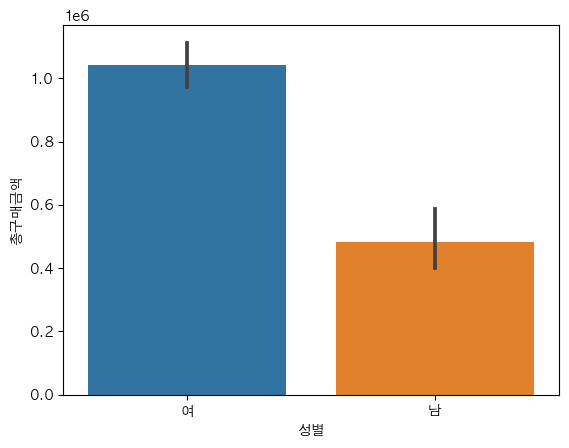

In [19]:
df12 = df2.pivot_table(index = '성별', values='총구매금액', aggfunc = 'mean')
df12 = df12.round(0)
import seaborn as sns
import matplotlib as mpl
mpl.rc('font', family = 'AppleGothic')
sns.barplot(data=df2, x='성별', y='총구매금액')


13. df2 데이터를 이용해, '1회방문구매평균'을 바탕으로 고객등급을 분류하고자 한다. 10만원 이상 고객은 A / 5만원 이상은 B / 2만원 이상 C / 나머지는 D 등급으로 분류하여, '고객등급'이라는 새로운 항목을 생성하시오.  

In [20]:
import numpy as np

df2['고객등급'] = np.where(df2['1회방문구매평균']>=100000, 'A',
                np.where(df2['1회방문구매평균']>= 50000, 'B',
                np.where(df2['1회방문구매평균']>= 20000, 'C', 'D')))
df2


,회원번호,총방문횟수,총구매금액,총구매수량,회원상태,성별,결혼유무,주소,생년,연령,1회방문구매평균,연령대,고객등급
0,2101.0,342.0,1991230.0,382.0,정상회원,여,기혼,서울 강북구 미아동 134-,1967,51,5822.309942,50,D
1,2102.0,409.0,2095860.0,472.5,정상회원,여,NaN,경기 용인시 수지구 동천동,1947,71,5124.352078,70,D
2,2103.0,1598.0,8273550.0,1675.4,정상회원,여,기혼,경기 용인시 수지구 동천동,1972,46,5177.440551,40,D
3,2104.0,1180.0,6289495.0,1401.8,정상회원,여,NaN,경기 용인시 수지구 성복동,1969,49,5330.080508,40,D
4,2105.0,512.0,3067930.0,602.0,정상회원,여,기혼,경기 용인시 수지구 동천동,1948,70,5992.050781,70,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4391,4602.0,NaN,NaN,NaN,정상회원,여,미혼,경기 용인시 수지구 상현2동,1959,59,NaN,50,D
4392,4772.0,NaN,NaN,NaN,정상회원,여,기혼,경기 성남시 분당구 운중동,1972,46,NaN,40,D
4393,4780.0,NaN,NaN,NaN,탈퇴처리중,여,미혼,경기 용인시 수지구 풍덕천2,1943,75,NaN,70,D
4394,4832.0,NaN,NaN,NaN,정상회원,여,미혼,경기 용인시 수지구 상현동,1958,60,NaN,60,D


14. df2에서 '고객등급'을 input 함수를 이용해 특정 값을 입력했을 때, 해당 고객등급에서 '성별'에 따른 '총구매금액' 기술통계량(describe 함수 활용)을 계산하여 'result9_등급명.xlsx'저장하는 프로그램을 구성하시오. 

In [ ]:
df2.pivot_table(index = '성별', values = '총구매금액', aggfunc = 'describe')

In [24]:
answer = input('등급을 입력하세요 : ')

if answer == 'A':
    a = df2.query('고객등급 == "A"')
    result_a = a.pivot_table(index = '성별', values = '총구매금액', aggfunc = 'describe')
    result_a.to_excel('result9_A.xlsx')
    print ('A 등급을 저장하였습니다.')
elif answer == 'B':
    b = df2.query('고객등급 == "B"')
    result_b = b.pivot_table(index = '성별', values = '총구매금액', aggfunc = 'describe')
    result_b.to_excel('result9_B.xlsx')
    print ('B 등급을 저장하였습니다.')
elif answer == 'C':
    c = df2.query('고객등급 == "C"')
    result_c = c.pivot_table(index = '성별', values = '총구매금액', aggfunc = 'describe')
    result_c.to_excel('result9_C.xlsx')
    print ('C 등급을 저장하였습니다.')
elif answer == 'D':
    d = df2.query('고객등급 == "D"')
    result_d = b.pivot_table(index = '성별', values = '총구매금액', aggfunc = 'describe')
    result_d.to_excel('result9_D.xlsx')
    print ('D 등급을 저장하였습니다.')
else :
    print ('해당 등급이 없습니다')

등급을 입력하세요 : A
A 등급을 저장하였습니다.
